In [1]:
import json
import smv.DataDict as DataDict
import smv.Vars as Vars
path_tar = "examples/trace/BENCH=kbuild-sched/POWER=powersave-y/MONITORING=all/320-pull-back/3.tar"
path_json = "examples/line/pull-back-kbuild-sched.json"

In [2]:
var = Vars.Vars(Vars.from_tar(path_tar))
dd = DataDict.from_tar(path_tar,var)
json_config = var.parse(json.load(open(path_json)))

output/BENCH=kbuild-sched/POWER=powersave-y/MONITORING=all/320-pull-back/3/sched_log/tracer_npz/addr.npz loaded in 0.125777006149292 s
output/BENCH=kbuild-sched/POWER=powersave-y/MONITORING=all/320-pull-back/3/sched_log/tracer_npz/arg1.npz loaded in 0.12786293029785156 s
output/BENCH=kbuild-sched/POWER=powersave-y/MONITORING=all/320-pull-back/3/sched_log/tracer_npz/event.npz loaded in 0.12158489227294922 s
output/BENCH=kbuild-sched/POWER=powersave-y/MONITORING=all/320-pull-back/3/sched_log/tracer_npz/cpu.npz loaded in 0.14536333084106445 soutput/BENCH=kbuild-sched/POWER=powersave-y/MONITORING=all/320-pull-back/3/sched_log/tracer_npz/prv_frq_on_same_cpu.npz loaded in 0.14634084701538086 s

output/BENCH=kbuild-sched/POWER=powersave-y/MONITORING=all/320-pull-back/3/sched_log/tracer_npz/pid.npz loaded in 0.11892390251159668 s
output/BENCH=kbuild-sched/POWER=powersave-y/MONITORING=all/320-pull-back/3/sched_log/tracer_npz/comm.npz loaded in 0.13394594192504883 s
output/BENCH=kbuild-sched/POW

In [3]:
import pandas as pd
df = pd.DataFrame(dd)

In [7]:
import smv.LinesFrame as LinesFrame
lines = LinesFrame.from_df(df, json_config)

In [9]:
lines.head()

,x0,y0,x1,y1,c,pid,arg0,arg1
74,2137972,24.0,2137972,24.5,0,11447,6384896,1852399981
170,3055809,104.0,3055809,104.5,0,11448,6384896,1701669236
677,249794966,104.0,249794966,104.5,0,11448,6384896,7239026
715,252714691,108.0,252714691,108.5,0,11449,6384896,1701536109
726,254357174,112.0,254357174,112.5,0,11450,6384896,1694525555


In [16]:
import datashader as ds
import datashader.transfer_functions as tf

In [20]:
from IPython.core.display import display, HTML
category = json_config['c']
display(HTML('\n'.join(
				['Categories:<ul style="list-style: none;padding-left: 0;">']+
				[
					'<li><span style="color: {};">◼</span>c[{}]={}</li>'.format(
						category[i]['color'],
						i,
						category[i]['label']
					)
					for i in range(len(category))
					if category[i]['len'] > 0
				]+
				["</ul>"]
			)))

In [37]:
result = lines
result = lines.query('c>15')
color_key =  [c['color'] for c in category if c['len'] > 0]
plot_width = 800
plot_height = 600
x_range = (0, 1e9)
y_range = (-1, 161)
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height,x_range=x_range, y_range=y_range)
agg = cvs.line(result, x=['x0','x1'], y=['y0','y1'], agg=ds.count_cat('c'), axis=1)
img = tf.shade(agg, min_alpha=255, color_key=color_key)

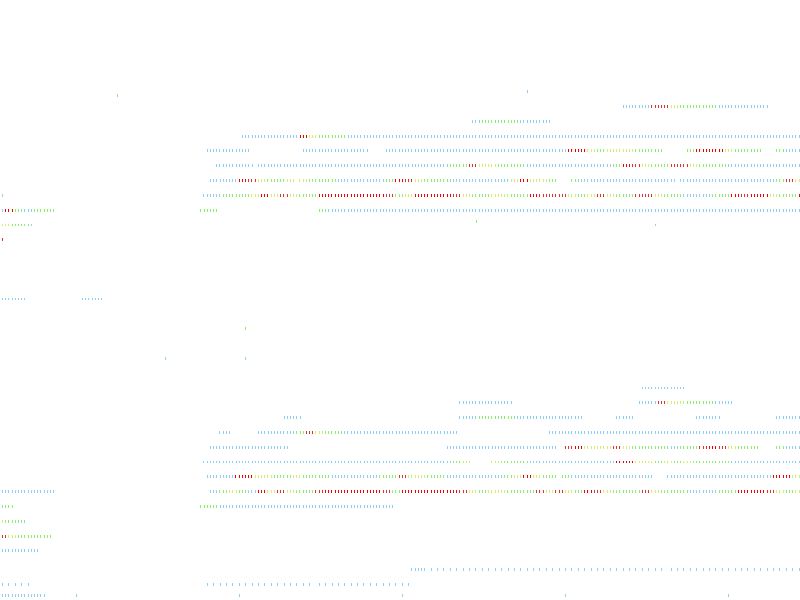

In [38]:
img

In [39]:
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.io import output_notebook
from datashader.bokeh_ext import InteractiveImage
output_notebook()
fig = figure(x_range=x_range,y_range=y_range,reset_policy="event_only",sizing_mode='stretch_both',)
def callback_InteractiveImage(x_range, y_range, plot_width, plot_height, name=None):
		cvs = ds.Canvas(
			plot_width=plot_width, plot_height=plot_height,
			x_range=x_range, y_range=y_range,
		)
		agg = cvs.line(result,
			x=['x0','x1'], y=['y0','y1'],
			agg=ds.count_cat('c'), axis=1,
		)
		img = tf.shade(agg, min_alpha=255, color_key=color_key)
		return img
interactiveImage = InteractiveImage(fig, callback_InteractiveImage)
show(fig)

Loading BokehJS ...